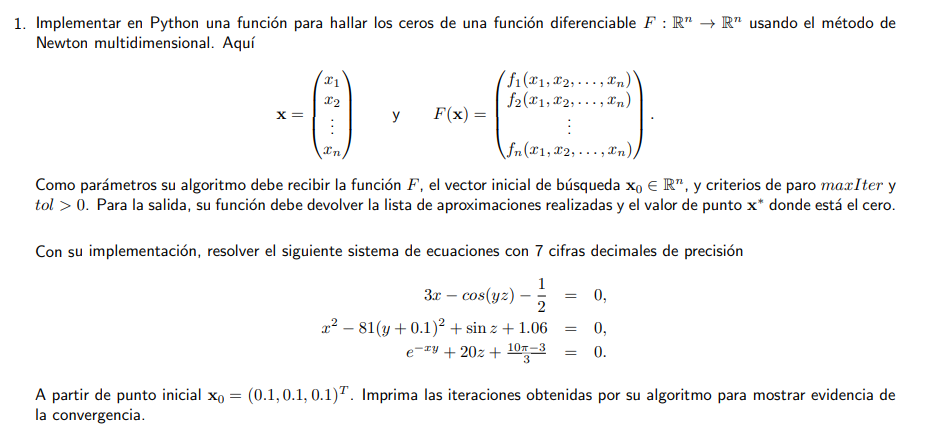

In [2]:
import numpy as np

def newton_method(F, x0, maxIter, tol):
    """
    Encuentra los ceros de una función vectorial F usando el método de Newton multidimensional.

    :param F: Función que toma un vector x y devuelve un vector de la misma dimensión.
    :param x0: Vector inicial de búsqueda.
    :param maxIter: Número máximo de iteraciones.
    :param tol: Tolerancia para el criterio de paro basado en la norma del residuo.
    :return: Lista de aproximaciones y el punto x* donde está el cero.
    """
    x = np.array(x0)
    
    def jacobian(F, x, epsilon=1e-8):
        """ Calcula la matriz Jacobiana de la función F en el punto x usando diferencias finitas. """
        n = len(x)
        m = len(F(x))
        J = np.zeros((m, n))
        for i in range(n):
            x1 = np.copy(x)
            x1[i] += epsilon
            J[:, i] = (F(x1) - F(x)) / epsilon
        return J
    
    approximations = [x]
    
    for k in range(maxIter):
        # Evaluar la función y la Jacobiana
        F_x = F(x)
        J_x = jacobian(F, x)
        
        # Resolver el sistema J(x) * delta_x = -F(x)
        delta_x = np.linalg.solve(J_x, -F_x)
        
        # Actualizar el punto
        x = x + delta_x
        approximations.append(x)
        
        # Verificar el criterio de paro
        if np.linalg.norm(F(x)) < tol:
            break
    
    return approximations, x

# Definir la función vectorial F
def F(X):
    x, y, z = X
    return np.array([
        3*x - np.cos(y*z) - 0.5,
        x**2 - 81*(y + 0.1)**2 + np.sin(z) + 1.06,
        np.exp(-x*y) + 20*z + (10 * np.pi - 3) / 3
    ])

# Parámetros
x0 = [0.1, 0.1, 0.1]
maxIter = 100
tol = 1e-7

# Ejecutar el método de Newton
approximations, x_star = newton_method(F, x0, maxIter, tol)

# Imprimir las aproximaciones y el resultado final
print("Aproximaciones realizadas:")
for approx in approximations:
    print(f"{approx[0]:.7f}, {approx[1]:.7f}, {approx[2]:.7f}")

print("\nPunto x* donde está el cero:")
print(f"{x_star[0]:.7f}, {x_star[1]:.7f}, {x_star[2]:.7f}")


Aproximaciones realizadas:
0.1000000, 0.1000000, 0.1000000
0.5002173, 0.0194896, -0.5215186
0.5000143, 0.0015920, -0.5235572
0.5000001, 0.0000125, -0.5235984
0.5000000, 0.0000000, -0.5235988

Punto x* donde está el cero:
0.5000000, 0.0000000, -0.5235988


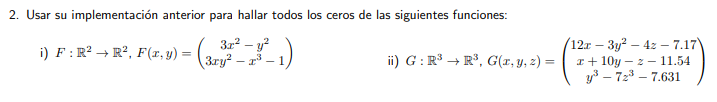

In [9]:
def G(X):
    x, y, z = X
    return np.array([
        12*x - 3*y**2 - 4*z - 7.17,
        x + 10*y - z - 11.54,
        y**3 - 7*z**3 - 7.631
    ])

def F(X):
    x, y = X
    return np.array([
        3*x**2 - y**2,
        3*x*y**2 - x**3 - 1
    ])

In [10]:
# Parámetros
x0 = [1.0, 1.0]
maxIter = 100
tol = 1e-7

# Ejecutar el método de Newton
approximations, x_star = newton_method(F, x0, maxIter, tol)

# Imprimir el resultado final
print("\nPunto x* donde está el cero de F(x,y):")
print(f"x = {x_star[0]:.7f}, y = {x_star[1]:.7f}")

# Verificar el resultado
print("\nValor de F en el punto encontrado:")
print(F(x_star))

# Imprimir las aproximaciones
print("\nAproximaciones realizadas:")
for i, approx in enumerate(approximations):
    print(f"Iteración {i}: x = {approx[0]:.7f}, y = {approx[1]:.7f}")


Punto x* donde está el cero de F(x,y):
x = 0.5000000, y = 0.8660254

Valor de F en el punto encontrado:
[ 3.45106943e-09 -5.08860054e-09]

Aproximaciones realizadas:
Iteración 0: x = 1.0000000, y = 1.0000000
Iteración 1: x = 0.6111111, y = 0.8333333
Iteración 2: x = 0.5036591, y = 0.8524944
Iteración 3: x = 0.4999641, y = 0.8660456
Iteración 4: x = 0.5000000, y = 0.8660254


In [4]:
# Parámetros
x0 = [0.5, 0.5, 0.5] 
maxIter = 100
tol = 1e-7

# Ejecutar el método de Newton
approximations, x_star = newton_method(G, x0, maxIter, tol)

# Imprimir el resultado final
print("\nPunto x* donde está el cero de G(x,y,z):")
print(f"x = {x_star[0]:.7f}, y = {x_star[1]:.7f}, z = {x_star[2]:.7f}")

# Verificar el resultado
print("\nValor de G en el punto encontrado:")
print(G(x_star))


Punto x* donde está el cero de G(x,y,z):
x = 0.5221282, y = 1.0036301, z = -0.9815705

Valor de G en el punto encontrado:
[-1.33226763e-14 -4.15667500e-13  2.01962891e-10]


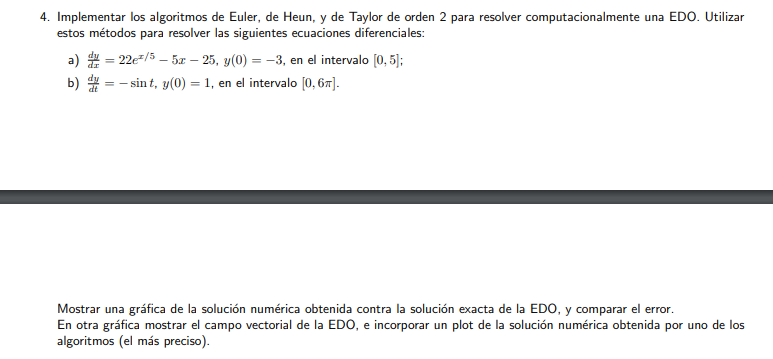

In [11]:
import numpy as np

def f(x, y):
    return 22 * np.exp(x/5) - 5*x - 25

def euler_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    return x, y

def heun_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i], y[i-1] + h * k1)
        y[i] = y[i-1] + 0.5 * h * (k1 + k2)
    return x, y

def taylor2_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        df_dx = 22/5 * np.exp(x[i-1]/5) - 5  # df/dx = d/dx(22e^(x/5) - 5x - 25)
        df_dy = 0  # df/dy = 0 (la función no depende de y)
        y[i] = y[i-1] + h * f(x[i-1], y[i-1]) + 0.5 * h**2 * (df_dx + df_dy * f(x[i-1], y[i-1]))
    return x, y
# Parámetros
x0, y0 = 0, -3
x_end = 5
h = 0.1  # Tamaño del paso

# Aplicar los métodos
x_euler, y_euler = euler_method(f, x0, y0, x_end, h)
x_heun, y_heun = heun_method(f, x0, y0, x_end, h)
x_taylor2, y_taylor2 = taylor2_method(f, x0, y0, x_end, h)

# Imprimir resultados
"""
print("Euler Method:")
for x, y in zip(x_euler, y_euler):
    print(f"x = {x:.1f}, y = {y:.4f}")

print("\nHeun Method:")
for x, y in zip(x_heun, y_heun):
    print(f"x = {x:.1f}, y = {y:.4f}")

print("\nTaylor Order 2 Method:")
for x, y in zip(x_taylor2, y_taylor2):
    print(f"x = {x:.1f}, y = {y:.4f}")

"""

'\nprint("Euler Method:")\nfor x, y in zip(x_euler, y_euler):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\nprint("\nHeun Method:")\nfor x, y in zip(x_heun, y_heun):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\nprint("\nTaylor Order 2 Method:")\nfor x, y in zip(x_taylor2, y_taylor2):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\n'

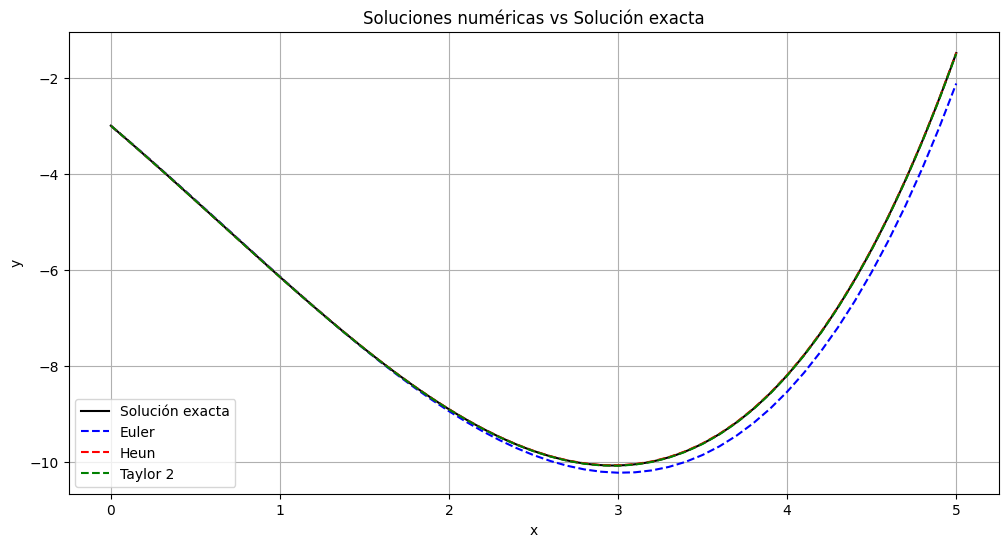

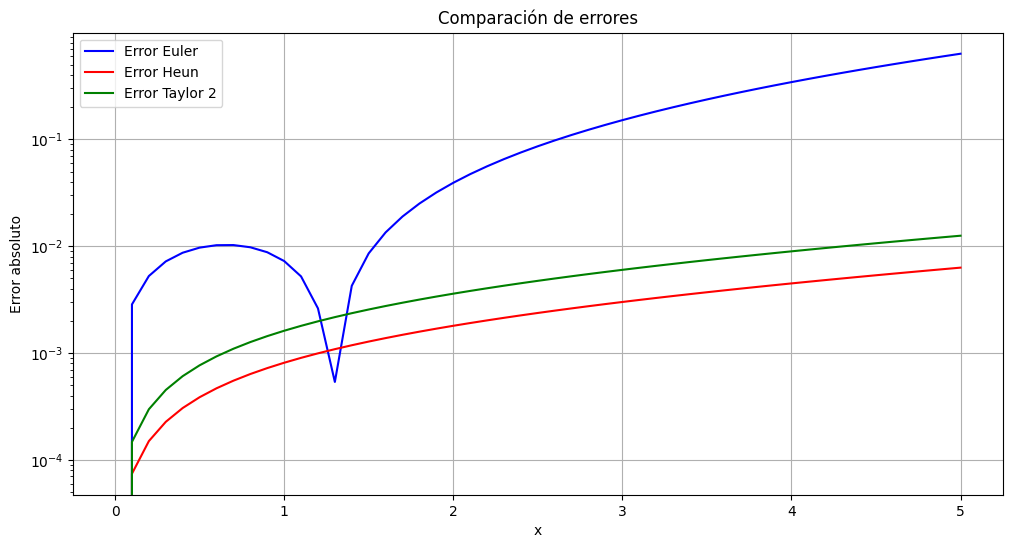

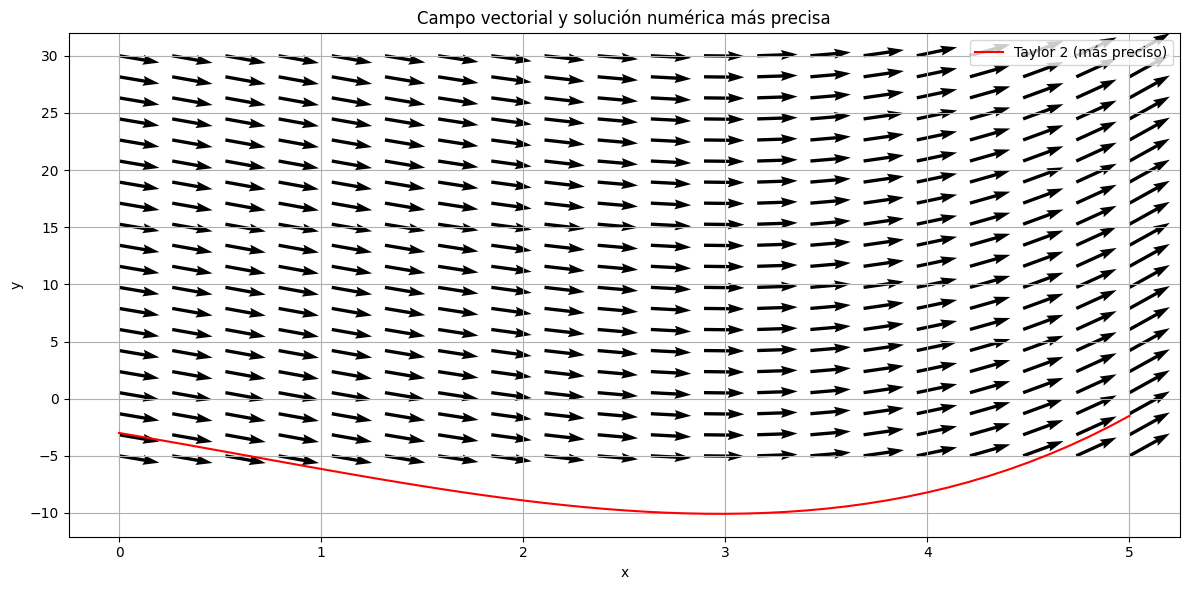

In [13]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solución exacta
def ode(y, x):
    return f(x, y)

x_exact = np.linspace(x0, x_end, 1000)
y_exact = odeint(ode, y0, x_exact)

# Gráfica 1: Soluciones numéricas vs solución exacta
plt.figure(figsize=(12, 6))
plt.plot(x_exact, y_exact, 'k-', label='Solución exacta')
plt.plot(x_euler, y_euler, 'b--', label='Euler')
plt.plot(x_heun, y_heun, 'r--', label='Heun')
plt.plot(x_taylor2, y_taylor2, 'g--', label='Taylor 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones numéricas vs Solución exacta')
plt.legend()
plt.grid(True)

# Cálculo de errores
error_euler = np.abs(y_euler - np.interp(x_euler, x_exact, y_exact.flatten()))
error_heun = np.abs(y_heun - np.interp(x_heun, x_exact, y_exact.flatten()))
error_taylor2 = np.abs(y_taylor2 - np.interp(x_taylor2, x_exact, y_exact.flatten()))

# Gráfica de errores
plt.figure(figsize=(12, 6))
plt.semilogy(x_euler, error_euler, 'b-', label='Error Euler')
plt.semilogy(x_heun, error_heun, 'r-', label='Error Heun')
plt.semilogy(x_taylor2, error_taylor2, 'g-', label='Error Taylor 2')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores')
plt.legend()
plt.grid(True)

# Gráfica 2: Campo vectorial y solución más precisa
plt.figure(figsize=(12, 6))
X, Y = np.meshgrid(np.linspace(0, 5, 20), np.linspace(-5, 30, 20))
U = np.ones_like(X)  # Cambiamos esto para que tenga la misma forma que X e Y
V = f(X, Y)
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=5, width=0.003)
plt.plot(x_taylor2, y_taylor2, 'r-', label='Taylor 2 (más preciso)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial y solución numérica más precisa')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- dy/dt = −sint, y(0) = 1, en el intervalo [0, 6π]

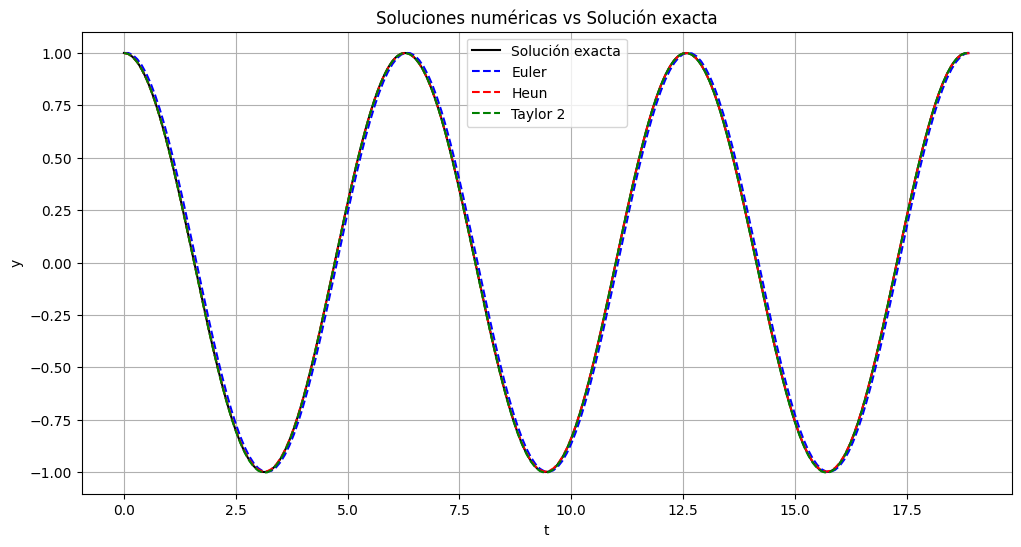

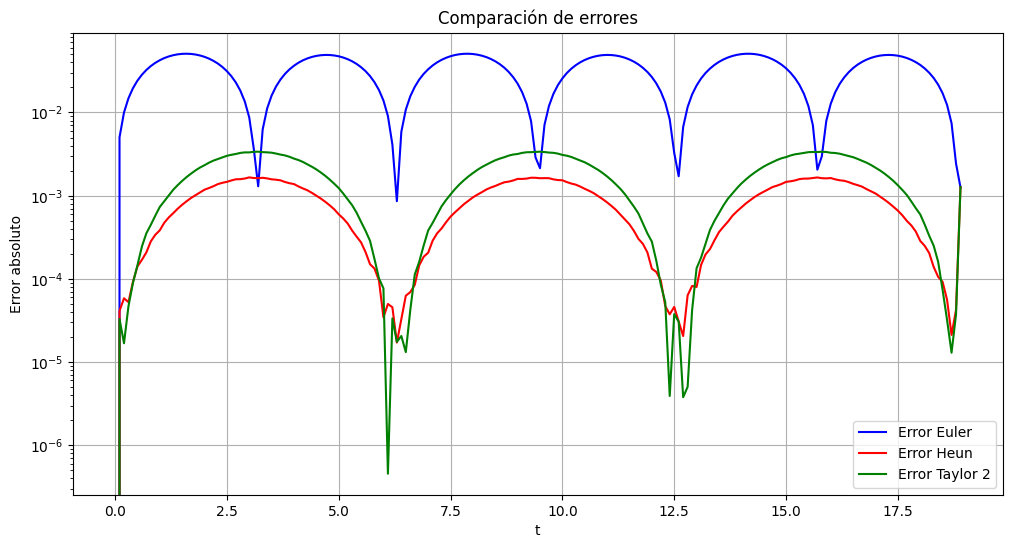

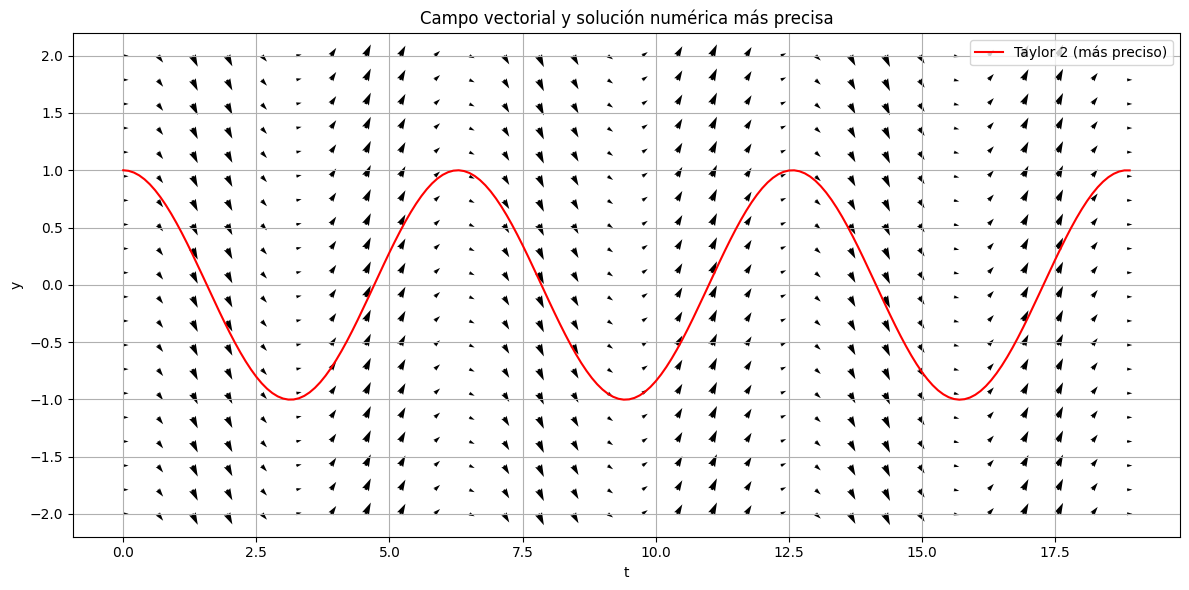

In [17]:

def f(t, y):
    return -np.sin(t)


# Parámetros
t0, y0 = 0, 1
t_end = 6 * np.pi
h = 0.1

# Aplicar los métodos
t_euler, y_euler = euler_method(f, t0, y0, t_end, h)
t_heun, y_heun = heun_method(f, t0, y0, t_end, h)
t_taylor2, y_taylor2 = taylor2_method(f, t0, y0, t_end, h)

# Solución exacta
def ode(y, t):
    return f(t, y)

t_exact = np.linspace(t0, t_end, 1000)
y_exact = odeint(ode, y0, t_exact)

# Gráfica 1: Soluciones numéricas vs solución exacta
plt.figure(figsize=(12, 6))
plt.plot(t_exact, y_exact, 'k-', label='Solución exacta')
plt.plot(t_euler, y_euler, 'b--', label='Euler')
plt.plot(t_heun, y_heun, 'r--', label='Heun')
plt.plot(t_taylor2, y_taylor2, 'g--', label='Taylor 2')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Soluciones numéricas vs Solución exacta')
plt.legend()
plt.grid(True)

# Cálculo de errores
error_euler = np.abs(y_euler - np.interp(t_euler, t_exact, y_exact.flatten()))
error_heun = np.abs(y_heun - np.interp(t_heun, t_exact, y_exact.flatten()))
error_taylor2 = np.abs(y_taylor2 - np.interp(t_taylor2, t_exact, y_exact.flatten()))

# Gráfica de errores
plt.figure(figsize=(12, 6))
plt.semilogy(t_euler, error_euler, 'b-', label='Error Euler')
plt.semilogy(t_heun, error_heun, 'r-', label='Error Heun')
plt.semilogy(t_taylor2, error_taylor2, 'g-', label='Error Taylor 2')
plt.xlabel('t')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores')
plt.legend()
plt.grid(True)

# Gráfica 2: Campo vectorial y solución más precisa
plt.figure(figsize=(12, 6))
T, Y = np.meshgrid(np.linspace(0, 6*np.pi, 30), np.linspace(-2, 2, 20))
U = np.ones_like(T)
V = f(T, Y)
plt.quiver(T, Y, U, V, angles='xy', scale_units='xy', scale=10, width=0.003)
plt.plot(t_taylor2, y_taylor2, 'r-', label='Taylor 2 (más preciso)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Campo vectorial y solución numérica más precisa')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

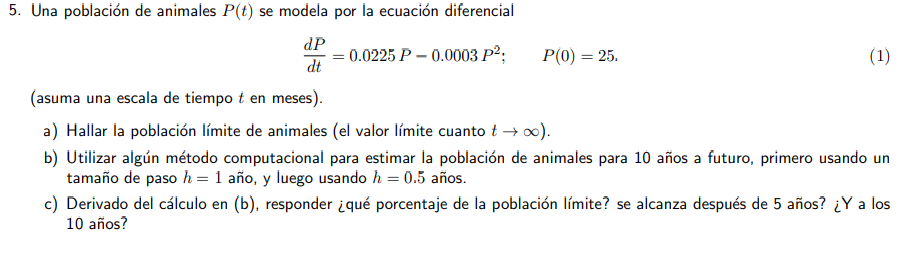

a) Hallar la población límite de animales (el valor límite cuando t → ∞)

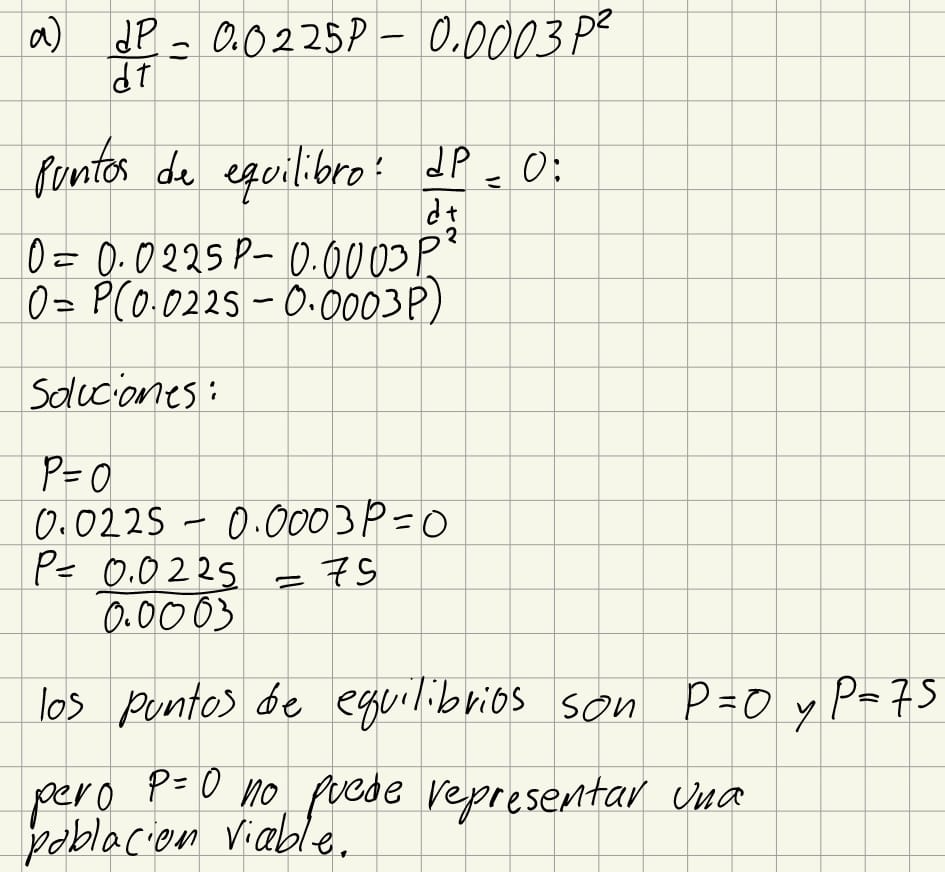

b) Utilizar algún método computacional para estimar la población de animales para 10 años a futuro, primero usando un
tamaño de paso h = 1 año, y luego usando h = 0.5 a˜nos

Para esto, usaremos el método de Euler para resolver la ecuación diferencial. Implementaremos este método en Python.

Paso de 1 año (ℎ = 1 h = 1)
Primero con un paso de 1 año:

P(t+h)=P(t)+h ⋅ dt/dP
​

Paso de 0.5 años (ℎ = 0.5 h = 0.5)
Luego con un paso de 0.5 años:

P(t+h)=P(t)+h ⋅ dt/dP
​


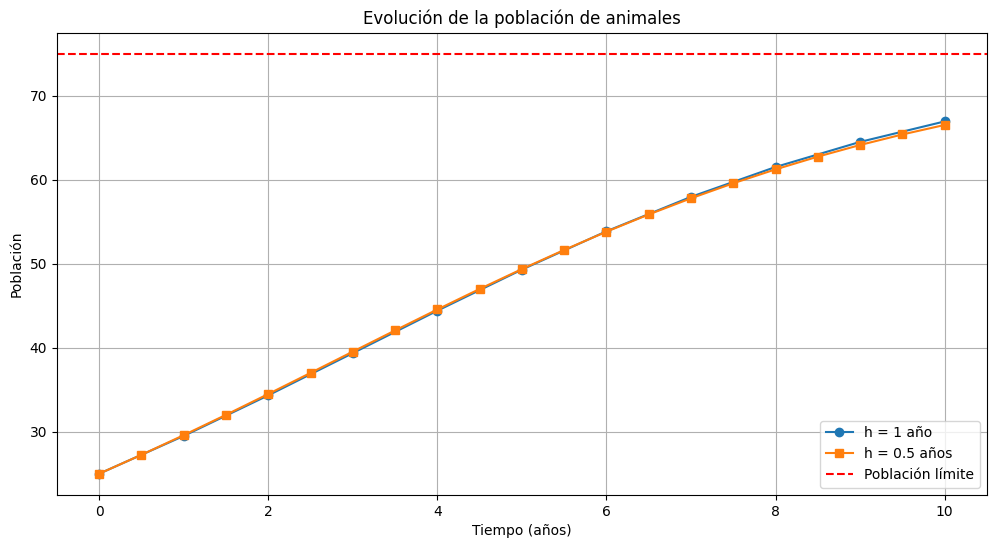

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
def dP_dt(P):
    return 0.0225 * P - 0.0003 * P**2

# Método de Euler
def euler_method(P0, h, t_max):
    t_values = np.arange(0, t_max + h, h)
    P_values = np.zeros(len(t_values))
    P_values[0] = P0
    
    for i in range(1, len(t_values)):
        P_values[i] = P_values[i-1] + h * dP_dt(P_values[i-1])
    
    return t_values, P_values

# Condiciones iniciales
P0 = 25
t_max = 10 * 12  # 10 años en meses

# Solución con h = 1 año (12 meses)
h1 = 12
t_values_1, P_values_1 = euler_method(P0, h1, t_max)

# Solución con h = 0.5 años (6 meses)
h2 = 6
t_values_2, P_values_2 = euler_method(P0, h2, t_max)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t_values_1 / 12, P_values_1, 'o-', label='h = 1 año')
plt.plot(t_values_2 / 12, P_values_2, 's-', label='h = 0.5 años')
plt.axhline(y=75, color='r', linestyle='--', label='Población límite')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población')
plt.title('Evolución de la población de animales')
plt.legend()
plt.grid(True)
plt.show()


c) Derivado del cálculo en (b), responder ¿qué porcentaje de la población límite? se alcanza después de 5 años? ¿Y a los
10 años?

In [4]:
# Porcentaje de la población límite alcanzado
P_limit = 75

# Población después de 5 años (60 meses)
P_5_years_h1 = P_values_1[5]
P_5_years_h2 = P_values_2[10]

# Población después de 10 años (120 meses)
P_10_years_h1 = P_values_1[-1]
P_10_years_h2 = P_values_2[-1]

# Porcentajes
percentage_5_years_h1 = (P_5_years_h1 / P_limit) * 100
percentage_5_years_h2 = (P_5_years_h2 / P_limit) * 100
percentage_10_years_h1 = (P_10_years_h1 / P_limit) * 100
percentage_10_years_h2 = (P_10_years_h2 / P_limit) * 100


print("Después de 5 años: " + str(percentage_5_years_h1) + " Con h = 1")
print("Después de 5 años: " + str(percentage_5_years_h2) + " Con h = 0.5")
print("Después de 5 años: " + str(percentage_10_years_h1) + " Con h = 1")
print("Después de 5 años: " + str(percentage_10_years_h2) + " Con h = 0.5")


Después de 5 años: 65.73228980254004 Con h = 1
Después de 5 años: 65.81603754362064 Con h = 0.5
Después de 5 años: 89.25220739442582 Con h = 1
Después de 5 años: 88.69211109164648 Con h = 0.5


Después de 5 años:


- Con h=1 año: 65.73%,
- Con h=0.5 años: 65.82%


Después de 10 años:

- Con h=1 año: 89.25%,
- Con h=0.5 años: 88.69%